In [1]:
#Add Matplotlib inline magic command
%matplotlib inline

In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import statistics
import scipy.stats as sts

In [3]:
#Load csv file
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# Get the columns and the rows from city data file that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows from city data file that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data type from city data file of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get the unique value of the type of city type from city data file
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points from the urban cities from city data file
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the columns and the rows from ride data file that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows from ride data file that are not null
ride_data_df.notnull().count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows from ride data file that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
#Merge City and Ride data file.
pyber_data_df=pd.merge(ride_data_df, city_data_df, how = "left", on =["city", "city"])

In [14]:
#Create the Urban, Suburban and Rural data frame
urban_cities_df = pyber_data_df[pyber_data_df ["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df [pyber_data_df["type"]=="Rural"]

In [15]:
#Get number of rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count ()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [16]:
#Get average fare for each city in the urban, suburban and rural cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare =rural_cities_df.groupby(["city"]).mean()["fare"]

In [17]:
#Get average number of driver for each city in the urban, suburban and rural cities
urban_driver_count = pyber_data_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = pyber_data_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = pyber_data_df.groupby(["city"]).mean()["driver_count"]

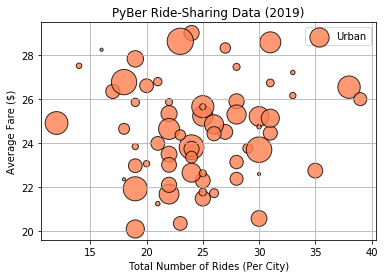

In [18]:
#Build the scatter plot for urban cities
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.legend()

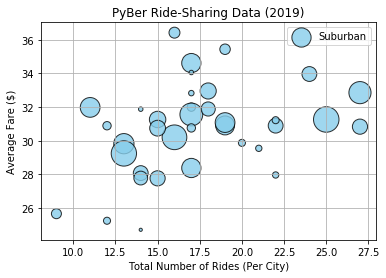

In [19]:
#Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, label ="Suburban", s= 10*suburban_driver_count, c="skyblue",edgecolor="black", linewidth = 1, alpha =0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

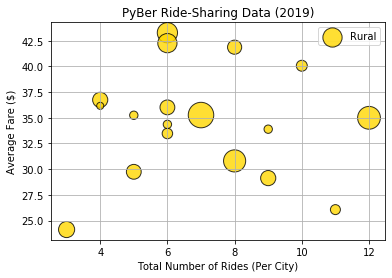

In [20]:
#Build the scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, label ="Rural", s= 10*rural_driver_count, c="gold",edgecolor="black", linewidth = 1, alpha =0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

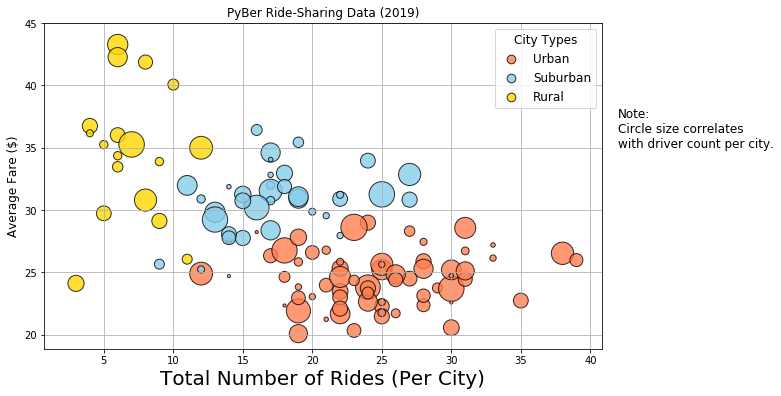

<Figure size 432x288 with 0 Axes>

In [21]:
#Build the scatter plot for urban cities
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s= 10*urban_driver_count, c="coral",
            edgecolor="black",linewidth = 1,
            alpha =0.8, label ="Urban")


#Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s= 10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidth = 1, 
            alpha =0.8, label ="Suburban")

#Build the scatter plot for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s= 10*rural_driver_count, c="gold",
            edgecolor="black", linewidth = 1, 
            alpha =0.8, label ="Rural")  

#Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 12) 

plt.grid(True)

#Add the legend
lgnd = plt.legend(fontsize ="12", mode = "Expanded", 
                  scatterpoints = 1, loc ="best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize=12)

#Show the plot
plt.show()

#Save the figure
plt.savefig("Resources/Fig1.png")

In [22]:
#Get summary statistics for urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [23]:
#Get summary statistics for suburban cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [24]:
#Get summary statistics for rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [25]:
#Calculate the mean of the ride count for each city type
round(urban_ride_count.mean()), round(suburban_ride_count.mean()), round(rural_ride_count.mean())

(25, 17, 7)

In [26]:
#Calculate the mean of the ride count for each city type
round(urban_ride_count.median()), round(suburban_ride_count.median()), round(rural_ride_count.median())

(24, 17, 6)

In [27]:
#Calculate the mean of the ride count for each city type
round(urban_ride_count.mode()), round(suburban_ride_count.mode()), round(rural_ride_count.mode())

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [28]:
# Calculate the measures of central tendencies for the ride count for the urban, suburban and rural cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)

print(f"The mode for the ride counts for rural trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for suburban trips is 24.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [29]:
#Get the fare for the urban cities.
urban_fares = urban_cities_df["fare"]

In [30]:
#Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [31]:
#Get the fare for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

In [32]:
#Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [33]:
#Get the fare for the rural cities.
rural_fares = rural_cities_df["fare"]

In [34]:
#Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [35]:
#Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]

In [36]:
#Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]

In [37]:
#Get the driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]

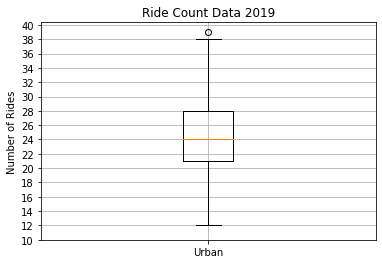

In [38]:
#Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

#Add the title, y-axix label and grid.
ax.set_title("Ride Count Data 2019")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

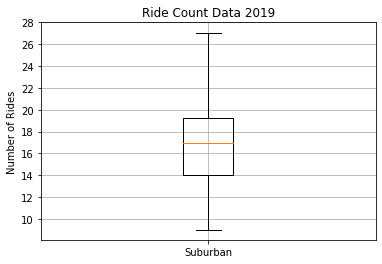

In [39]:
#Create a box-and-whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

#Add the title, y-axix label and grid.
ax.set_title("Ride Count Data 2019")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,30, step=2.0))
ax.grid()
plt.show()

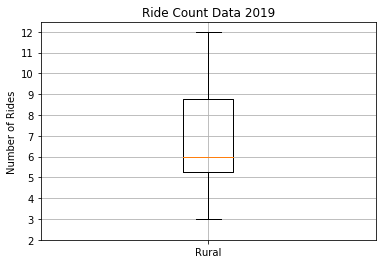

In [40]:
#Create a box-and-whisker plot for the rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_ride_count, labels=x_labels)

#Add the title, y-axix label and grid.
ax.set_title("Ride Count Data 2019")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2,13, step=1.0))
ax.grid()
plt.show()

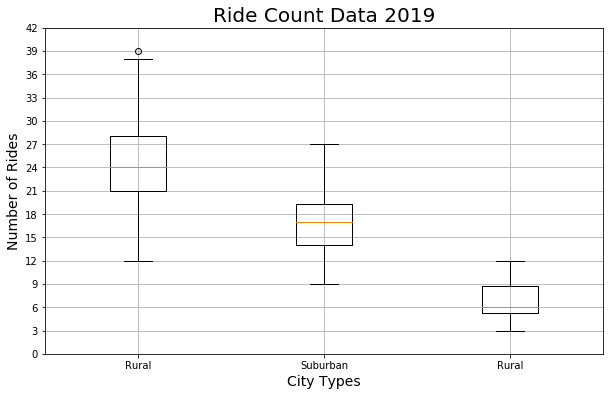

<Figure size 432x288 with 0 Axes>

In [41]:
#Add all ride count box-and-whisker plots to the same graph
x_labels = ["Rural", "Suburban","Rural"]
ride_count_data =[urban_ride_count,suburban_ride_count,rural_ride_count]
fig, ax = plt.subplots(figsize =(10,6))
ax.set_title("Ride Count Data 2019", fontsize =20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
plt.show()

plt.savefig("Resources/Fig2.png")

In [42]:
#Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier } has the highest rider count.")

West Angela has the highest rider count.


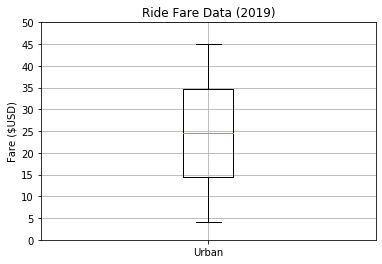

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [43]:
#Create a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax =plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#Add title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

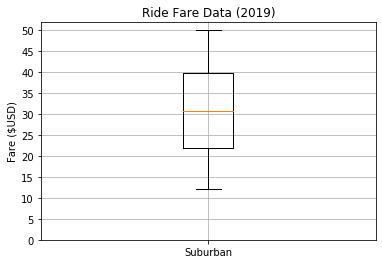

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [44]:
#Create a box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fig, ax =plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#Add title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

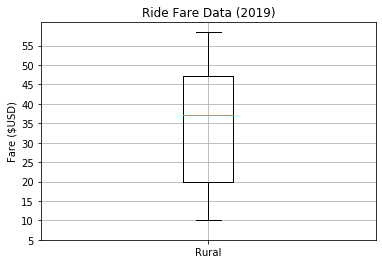

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [45]:
#Create a box-and-whisker plot for the rural fare data
x_labels = ["Rural"]
fig, ax =plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#Add title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5, 60, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

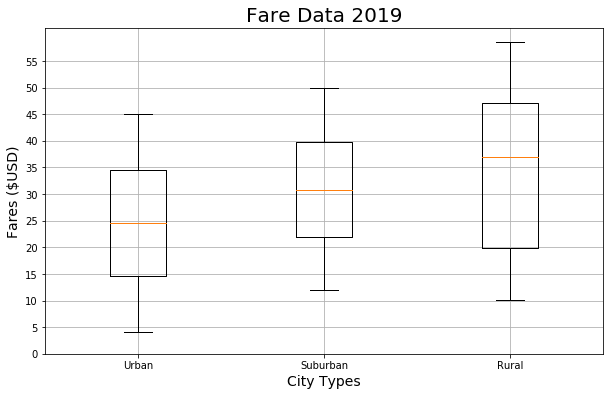

<Figure size 432x288 with 0 Axes>

In [46]:
#Add all fare box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_fares_data =[urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize =(10,6))
ax.set_title("Fare Data 2019", fontsize =20)
ax.set_ylabel("Fares ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fares_data, labels=x_labels)
ax.set_yticks(np.arange(0,60,step=5))
ax.grid()
plt.show()

plt.savefig("Resources/Fig3.png")

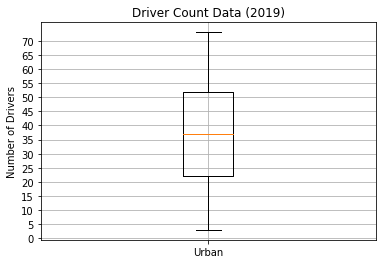

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [47]:
#Create a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax =plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#Add title, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

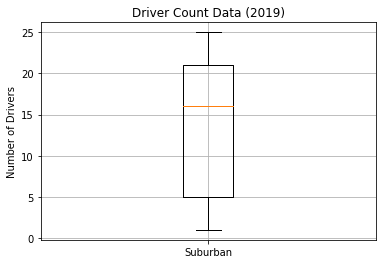

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [48]:
#Create a box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fig, ax =plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#Add title, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

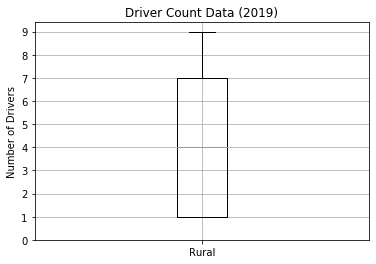

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [49]:
#Create a box-and-whisker plot for the rural fare data
x_labels = ["Rural"]
fig, ax =plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#Add title, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

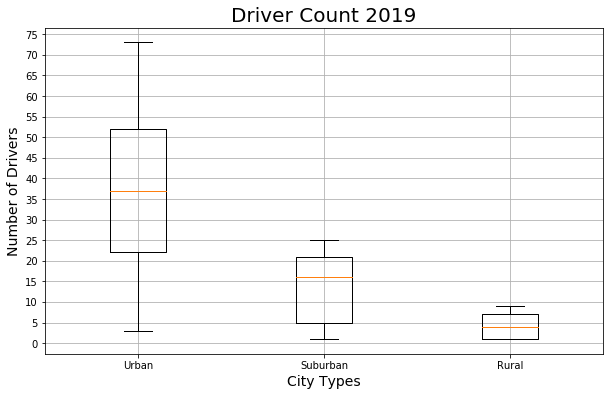

<Figure size 432x288 with 0 Axes>

In [50]:
#Add all drivers box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
drivers_data =[urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize =(10,6))
ax.set_title("Driver Count 2019", fontsize =20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0,76,step=5))
ax.grid()
plt.show()

plt.savefig("Resources/Fig4.png")

In [51]:
#Calculate the percentage of fares for each city type
type_percents = pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.sum()["fare"]*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

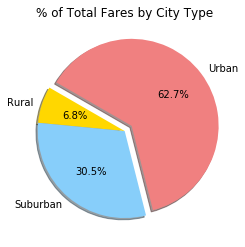

In [52]:
#Build the fare percentage of fares by city type pie chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold","lightskyblue","lightcoral"], 
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)

plt.title("% of Total Fares by City Type")

#Changethe default font size from 10 to 14
mpl.rcParams['font.size']=14

#Save Figure
plt.savefig("Resources/Fig5.png")

#Show figure
plt.show()

In [53]:
#Calculate the ride percentage for each city type
ride_percents = pyber_data_df.groupby(["type"]).sum()["ride_id"]/pyber_data_df.sum()["ride_id"]*100
ride_percents

type
Rural        5.005212
Suburban    26.766722
Urban       68.228066
Name: ride_id, dtype: float64

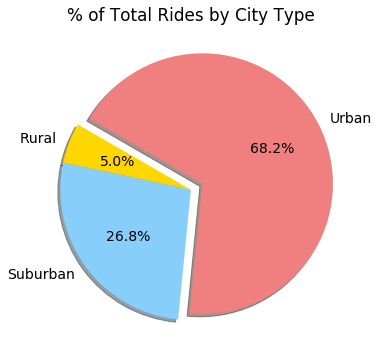

In [54]:
#Build percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       autopct="%1.1f%%",
       explode=[0,0,0.1],
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"]=14

#Save Figure
plt.savefig("Resources/Fig6.png")

#Show Figure
plt.show()

In [55]:
#Calculate the drivers percentage for each city type
drivers_percents = pyber_data_df.groupby(["type"]).sum()["driver_count"]/pyber_data_df.sum()["driver_count"]*100
drivers_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

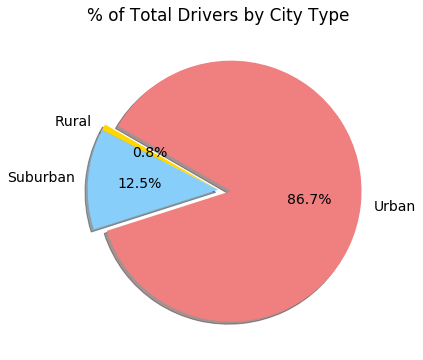

In [56]:
#Build percentage of drivers by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(drivers_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       autopct="%1.1f%%",
       explode=[0,0,0.1],
       shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"]=14

#Save Figure
plt.savefig("Resources/Fig7.png")

#Show Figure
plt.show()